This is the first notebook of a series of notebooks for the case study of predicting diabetes. In this notebook, data will be downloaded from corresponding data source and stored in the working directory. Preliminary exploration will be performed with the sole purpose of checking data quality and remediating data where necessary. More detailed exploration and feature engineering won't be covered in this notebook, and will be introduced later in the series.

1. Download data from Datasource. 

This study uses the data from Kaggle. Url: https://www.kaggle.com/therealsampat/early-stage-diabetes-prediction/data
<br> The data is then saved into the data/raw folder in the root directory

2. Import packages

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling 
from pandas_profiling import ProfileReport

import matplotlib.pyplot as plt
import seaborn as sns

/Applications/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
df = pd.read_csv('../data/raw/diabetes_data_upload.csv')

3. Overview of dataset

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


The column 'class' seems to be the target variable
<br> All columns except for 'Age' seem to be catorical variables

4. Checking missing values

In [7]:
df.info()
df.isna().sum(axis = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

There is no missing values

5. checking duplicates

In [8]:
df[df.duplicated()]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
84,35,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,No,No,Positive
159,38,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Positive
160,28,Female,No,No,No,No,No,No,Yes,No,No,No,Yes,Yes,No,No,Positive
161,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
162,35,Female,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,53,Male,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,Yes,Yes,No,Negative
497,47,Male,No,No,No,No,No,No,No,No,Yes,No,Yes,No,No,Yes,Negative
498,68,Female,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,No,No,Positive
499,64,Male,No,No,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Negative


In [31]:
df_woduplicates = df.drop_duplicates()
print(df_woduplicates.shape, df.shape, sep = ';')

(251, 17);(520, 17)


At first glance, there seems to be quite a few 'duplicates'; in fact, 'duplicates' represent half of the records
<br> this defintely calls for a further analysis. One theory is that those so called 'duplicates' actually belong to different patients with exactly same charateristics; another theory might be that data were intentionally repeated in order to battle data imbalance.

6. check outliers 

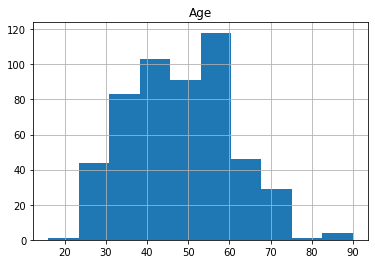

In [35]:
%matplotlib inline
df.hist()
plt.show()

The numeric variable of 'Age' falls into the normal expectation of human life span.

In [13]:
for i in df.columns:
    if i != 'Age':
        print(df[i].value_counts())

Male      328
Female    192
Name: Gender, dtype: int64
No     262
Yes    258
Name: Polyuria, dtype: int64
No     287
Yes    233
Name: Polydipsia, dtype: int64
No     303
Yes    217
Name: sudden weight loss, dtype: int64
Yes    305
No     215
Name: weakness, dtype: int64
No     283
Yes    237
Name: Polyphagia, dtype: int64
No     404
Yes    116
Name: Genital thrush, dtype: int64
No     287
Yes    233
Name: visual blurring, dtype: int64
No     267
Yes    253
Name: Itching, dtype: int64
No     394
Yes    126
Name: Irritability, dtype: int64
No     281
Yes    239
Name: delayed healing, dtype: int64
No     296
Yes    224
Name: partial paresis, dtype: int64
No     325
Yes    195
Name: muscle stiffness, dtype: int64
No     341
Yes    179
Name: Alopecia, dtype: int64
No     432
Yes     88
Name: Obesity, dtype: int64
Positive    320
Negative    200
Name: class, dtype: int64


All categorical fields contain only 2 values.  

This completes the first notebook of data wrangling. The table has no missing data and no outliers. One thing to keep in mind is the potential duplicates, which we will make a decision in later process.
<br> The next notebook will be on exploratory data analysis.